# **Import Libraries**

In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Import the data**

In [56]:
data = pd.read_csv("/content/ann_reg.csv")

# **pre-processing**

## Let's look at the data

In [57]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AT      47844 non-null  object
 1   V       47844 non-null  object
 2   AP      47844 non-null  object
 3   RH      47844 non-null  object
 4   PE      47844 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


**As we see in the data have object data type so we should now witch indices make the dataframe type change**

## handling the missing value

In [59]:
string_indices = {}

for col in data.columns:
    column_numeric = pd.to_numeric(data[col], errors='coerce' )
    string_indices[col] = np.where(column_numeric.isna())[0]

print(string_indices)

{'AT': array([ 9568, 19137, 28706, 38275]), 'V': array([ 9568, 19137, 28706, 38275]), 'AP': array([ 9568, 19137, 28706, 38275]), 'RH': array([ 9568, 19137, 28706, 38275]), 'PE': array([ 9568, 19137, 28706, 38275])}


In [60]:
for col, indices in string_indices.items():
    indices_to_drop = [idx for idx in indices if idx in data.index]
    data = data.drop(indices_to_drop)

In [61]:
data = data.astype('float32')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47840 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float32
 1   V       47840 non-null  float32
 2   AP      47840 non-null  float32
 3   RH      47840 non-null  float32
 4   PE      47840 non-null  float32
dtypes: float32(5)
memory usage: 1.3 MB


## NAN value

In [63]:
data.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

<Axes: >

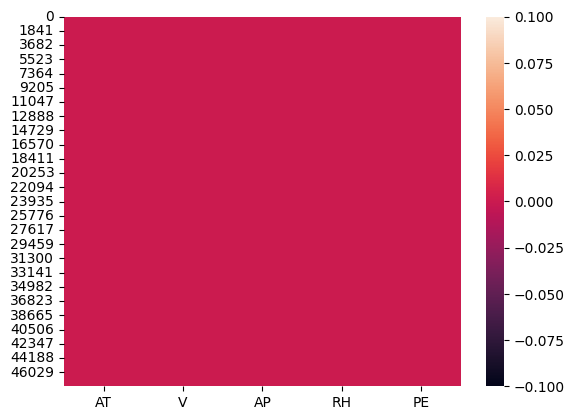

In [64]:
sns.heatmap(data.isna())

# **Split The Data**

In [65]:
X = data.drop(columns = "PE" , axis = 1).values
y = data["PE"].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bulding ANN

In [67]:
ann = tf.keras.models.Sequential()

In [68]:
ann.add(tf.keras.layers.Dense(units = 6  , activation="relu"))

In [69]:
ann.add(tf.keras.layers.Dense(units = 6  , activation="relu"))

In [70]:
ann.add(tf.keras.layers.Dense(units = 1))

In [71]:
ann.compile(optimizer="adam" , loss = "mean_squared_error")

In [72]:
ann.fit(X_train , y_train , batch_size = 32 , epochs = 100)

Epoch 1/100
1196/1196 [==============================] - 3s 2ms/step - loss: 5523.2920
Epoch 2/100
1196/1196 [==============================] - 2s 2ms/step - loss: 159.3270
Epoch 3/100
1196/1196 [==============================] - 2s 2ms/step - loss: 37.9716
Epoch 4/100
1196/1196 [==============================] - 2s 2ms/step - loss: 30.5772
Epoch 5/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.7647
Epoch 6/100
1196/1196 [==============================] - 2s 2ms/step - loss: 29.5862
Epoch 7/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.3174
Epoch 8/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.3394
Epoch 9/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.3785
Epoch 10/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.3925
Epoch 11/100
1196/1196 [==============================] - 2s 2ms/step - loss: 28.0879
Epoch 12/100
1196/1196 [==============================] - 2s